In [67]:
!pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 20.3.3
    Uninstalling pip-20.3.3:
      Successfully uninstalled pip-20.3.3


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Acceso denegado: 'C:\\Users\\sistemas\\AppData\\Local\\Temp\\pip-uninstall-e1su7a4z\\pip.exe'
Consider using the `--user` option or check the permissions.



In [53]:
!pip install wordcloud

You should consider upgrading via the 'c:\users\sistemas\anaconda3\python.exe -m pip install --upgrade pip' command.


In [67]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
import datetime as dt

In [40]:
def startsWithDate(s):
    pattern = '^([0-9]|(1)[0-9]|(2)[0-9]|(3)[0-1])(\/)(([0-9]|(1)[0-2]))(\/)(\d{2}|\d{4}) ([0-9][0-9]):([0-9][0-9]) -'
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [3]:
def startsWithAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '([\w]+[[:punct:]]+[\s]+[\w]+[\s]+[[:punct:]]+[\s]+[\w]+):',
        '([\w]+[[:punct:]]+[\s]+[\w]+[\s]+[\s]+[\w]+):',
        '([\w]+[\s]+[\w]+[\s]+[[:punct:]]+[\s]+[\w]+):',
        '([+]\d{2} \d{5} \d{5}):',         # Mobile Number (India)
        '([+]\d{2} \d{3} \d{3} \d{4}):',   # Mobile Number (US)
        '([+]\d{2} \d{4} \d{7})'           # Mobile Number (Europe)
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [41]:
def getDataPoint(line):
    # line = 18/06/17, 22:47 - Loki: Why do you have 2 numbers, Banner?
    splitLine = line.split(' - ') # splitLine = ['18/06/17, 22:47', 'Loki: Why do you have 2 numbers, Banner?'] 
    dateTime = splitLine[0] # dateTime = '18/06/17, 22:47'
    date, time = dateTime.split(' ') # date = '18/06/17'; time = '22:47'
    message = ' '.join(splitLine[1:]) # message = 'Loki: Why do you have 2 numbers, Banner?'

    if startsWithAuthor(message): # True
        splitMessage = message.split(': ') # splitMessage = ['Loki', 'Why do you have 2 numbers, Banner?']
        author = splitMessage[0] # author = 'Loki'
        message = ' '.join(splitMessage[1:]) # message = 'Why do you have 2 numbers, Banner?'
    else:
        author = None
    return date, time, author, message

In [42]:
%matplotlib inline

In [43]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
# Upload your file here
conversationPath = 'Chat de WhatsApp con Soporte Napse - Kilbel.txt' # chat file

In [44]:
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file (usually contains information about end-to-end encryption)
        
    messageBuffer = [] # Buffer to capture intermediate output for multi-line messages
    date, time, author = None, None, None # Intermediate variables to keep track of the current message being processed
    
    while True:
        line = fp.readline() 
        if not line: # Stop reading further if end of file has been reached
            break
        line = line.strip() # Guarding against erroneous leading and trailing whitespaces
        if startsWithDate(line): # If a line starts with a Date Time pattern, then this indicates the beginning of a new message
            if len(messageBuffer) > 0: # Check if the message buffer contains characters from previous iterations
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) # Save the tokens from the previous message in parsedData
            messageBuffer.clear() # Clear the message buffer so that it can be used for the next message
            date, time, author, message = getDataPoint(line) # Identify and extract tokens from the line
            messageBuffer.append(message) # Append message to buffer
        else:
            messageBuffer.append(line) # If a line doesn't start with a Date Time pattern, then it is part of a multi-line message. So, just append to buffer

In [45]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
df.sample(10)

,Date,Time,Author,Message
1226,20/8/20,20:11,Suc 11,Juan de Garay
2765,20/10/20,11:52,Suc 02,Caja 1 me da ese error al querer cortar visa c...
5294,19/12/20,15:15,Suc 02,Al ingresar un primer medio de pago caja 2 se ...
1287,25/8/20,16:19,Suc 12,Hola buenas tardes.. Informo q quisimos anular...
3281,5/11/20,09:24,Suc 09,<Multimedia omitido>
6550,23/1/21,08:02,Soporte Kilbel,estoy hablando con compras
4846,9/12/20,21:26,Suc 04,Buenas noches. Estamos teniendo diferencia en...
1524,30/8/20,09:15,Suc 11,Ok gracias
5070,12/12/20,19:47,Suc 03,<Multimedia omitido>
3799,15/11/20,09:21,Suc 02,No me estan pasando las tk


In [46]:
df.describe()

,Date,Time,Author,Message
count,6642,6642,6624,6642
unique,186,868,22,4553
top,20/8/20,08:26,Lucas Nuzzo,<Multimedia omitido>
freq,138,23,1323,1163


In [30]:
df['Author'].unique()

array([None, 'Lucas Nuzzo', 'Suc 11', 'Soporte Kilbel 2', 'Nelson Cancino',
       'Sebastian Napse', 'Betiana Vinciguerra', 'Walter Zumoffen',
       'Soporte Kilbel', 'Suc 09', 'Diego Souza', 'Suc 12', 'Suc 07',
       'Suc 06', 'Suc 10', 'Suc 02', 'Suc 04', 'Suc 03', 'Suc 05',
       'Suc 08', 'Suc 01'], dtype=object)

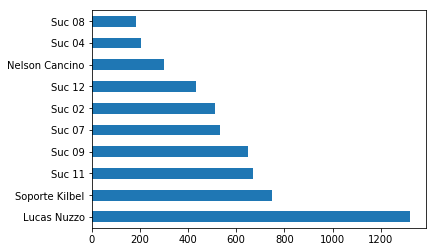

In [47]:
#Mensajes por autor
author_value_counts = df['Author'].value_counts()
top_10_author_value_counts = author_value_counts.head(10) # Number of messages per author for the top 10 most active authors
top_10_author_value_counts.plot.barh()


In [48]:
 df['Author'].describe()

count            6624
unique             22
top       Lucas Nuzzo
freq             1323
Name: Author, dtype: object

In [49]:
top_10_author_value_counts

Lucas Nuzzo       1323
Soporte Kilbel     748
Suc 11             671
Suc 09             647
Suc 07             534
Suc 02             511
Suc 12             433
Nelson Cancino     300
Suc 04             205
Suc 08             184
Name: Author, dtype: int64

In [50]:
#Mensajes sin autor
null_authors_df = df[df['Author'].isnull()]
null_authors_df.head()

,Date,Time,Author,Message
0,29/6/20,12:00,None,"Creaste el grupo ""Soporte Napse Kilbel"""
8,29/6/20,12:03,None,Añadiste a Sebastian Napse
9,29/6/20,12:03,None,Añadiste a Walter Zumoffen
282,8/7/20,00:53,None,‎Nelson Cancino cambió el ícono de este grupo
527,27/7/20,10:43,None,Añadiste a Suc. 09 JDR


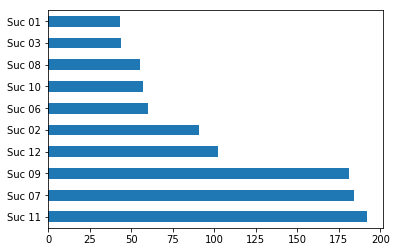

In [51]:
#Mensajes con multimedia (los omitimos en la exportación y ahora en el analisis de texto)
media_messages_df = df[df['Message'] == '<Multimedia omitido>']
author_media_messages_value_counts = media_messages_df['Author'].value_counts()
top_10_author_media_messages_value_counts = author_media_messages_value_counts.head(10)
top_10_author_media_messages_value_counts.plot.barh()

In [52]:
messages_df = df.drop(null_authors_df.index) # Drops all rows of the data frame containing messages from null authors
messages_df = messages_df.drop(media_messages_df.index) # Drops all rows of the data frame containing media messages
messages_df.sample(50)

,Date,Time,Author,Message
5876,5/1/21,20:17,Soporte Kilbel,Lo reporto
3783,14/11/20,08:41,Suc 09,se informa que las cuatro cajas se encuentra e...
5526,26/12/20,18:06,Soporte Kilbel,"sino ficho, se puede tirar manual"
2549,14/10/20,20:41,Suc 02,Caja 3 no emite z
5242,18/12/20,10:07,Suc 11,Esta todo bien
5700,31/12/20,10:14,Suc 07,Cuando se hace nota de crédito por la diferen...
5363,21/12/20,11:34,Suc 10,Caja 3 marca error en comunicación con impreso...
4233,26/11/20,07:19,Lucas Nuzzo,"Buen dia, si, de ninguna express, lo vemos"
4979,11/12/20,15:52,Suc 11,Luego de fichar un producto quedo asi
5180,15/12/20,15:22,Suc 04,En las cajas no estan haciendo los descuentos ...


In [53]:
messages_df['Message']

1       Hola este grupo usemoslo para reportar inconve...
2                                                    👍🏻👍🏻
3                            Nelson decime a quien agrego
4                                                       👍
5                                  por ahora a Sebastian.
6       esto no inactiva que manden el mail a soporte,...
10                      El cliente sigue ahi en ese caso?
11      supuestamente la transaccion esta cerrada, per...
14      Hola, pueden verificar que el puerto del pinpa...
15                                       No anula el pago
16      mata al POS, luego cuando te pida login, deslo...
17                   El cliente ya se fué con los tickets
18                                    No finalizo el pago
19      Ok, hace eso por fa, reinicia POS, saca al usu...
20                                                   Okey
21      luego pasar por mail el inicidente a soporte y...
22      despues lo de vtol, pueden ser microcortes, as...
23            

In [54]:
text = " ".join(review for review in messages_df['Message'])
print ("There are {} words in all the messages.".format(len(text)))
text

There are 204401 words in all the messages.


'Hola este grupo usemoslo para reportar inconvenientes 👍🏻👍🏻 Nelson decime a quien agrego 👍 por ahora a Sebastian. esto no inactiva que manden el mail a soporte, la idea es que podamos tener mas agilidad, pero sino lo podemos resolver hay que escalarlo a soporte de napse El cliente sigue ahi en ese caso? supuestamente la transaccion esta cerrada, pero por algun problema que no podemos identificar pierde conexion a la base y no espera pasar a offline y lanza ese cartel Hola, pueden verificar que el puerto del pinpad sea el correcto? No anula el pago mata al POS, luego cuando te pida login, desloguea al usuario pasando la tarjeta de supervisor El cliente ya se fué con los tickets No finalizo el pago Ok, hace eso por fa, reinicia POS, saca al usuario de la sesion con supervisor Okey luego pasar por mail el inicidente a soporte y pasar el log, yo lo sigo aqui despues lo de vtol, pueden ser microcortes, asegurar lo que dice Seba, pero considerar lo que menciono. No sé modificó Que puerto te 

In [63]:
stopwords = set(STOPWORDS)
stopwords.update(["que", "y", "si", "de", "la", "en","Buen dia", "Buen día","Buen  día", 
                  "con", "por", "para", "ya", "gracias", "ok", "se", "el"])

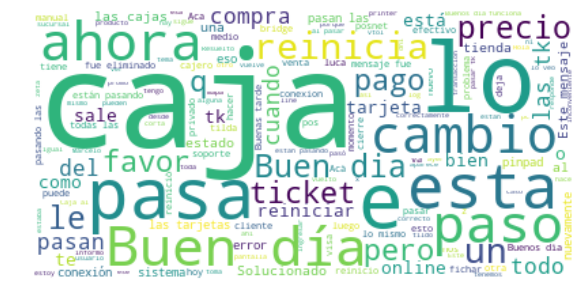

In [64]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:

plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0.5,0,'Date')

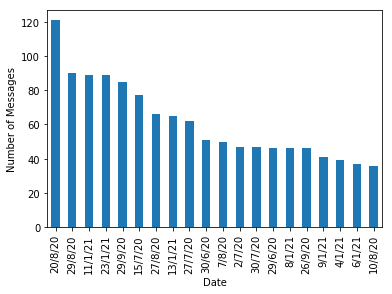

In [39]:
messages_df['Date'].value_counts().head(20).plot.bar()
plt.ylabel('Number of Messages')
plt.xlabel('Date')

In [65]:
date_df = messages_df.groupby("Date").sum()
date_df.reset_index(inplace=True)
fig = px.line(date_df, x="Date", y="MessageCount", title='Number of Messages as time moves on.')
fig.update_xaxes(nticks=20)
fig.show()

NameError: name 'px' is not defined

In [69]:
messages_df['Date'].dt.weekday

AttributeError: Can only use .dt accessor with datetimelike values

In [68]:
def dayofweek(i):
  dias = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
  return dias[i];
day_df=pd.DataFrame(messages_df["Message"])
day_df['day_of_date'] = messages_df['Date'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(dayofweek)
day_df["messagecount"] = dias
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)

fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0,6000]
    )),
  showlegend=False
)
fig.show()

AttributeError: Can only use .dt accessor with datetimelike values